[View in Colaboratory](https://colab.research.google.com/github/santoshb070/GoogleCollab/blob/dev/Linear_Regression/LinearRegression_Boston_Data.ipynb)

# Boston Housing Data

In this exercise we will use linear regression to predict housing prices in Boston. The purpose of this exercise is to demonstrate basic use of sci-kit learn and understand some of the concepts behind machine learning. We will be taking the following steps from the [Cross Industry Standard Processing for Data Mining](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining):

1. Business Understanding
1. Data Understanding
1. Data Preparation
1. Modeling
1. Evaluation
1. Deployment

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/599px-CRISP-DM_Process_Diagram.png)


## 1. Business Understanding

This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives. 

Creating a model is only valuable if someone needs it. Most things that can be predicted are valuable to someone. For example, lets say you were able to build a predictive model to predict earthquakes. This would be very valuable to insurance companies, city disaster planning, utility companies, etc.

In this situation let's pretend we are a real estate agency in Boston MA and we are interested in purchasing some houses. We would like to know which houses are under value to help us narrow down the list and put in an accurate bid on a house.

**Objective:** 

1. Identify what makes a property valuable?
1. What is a fair price for a house? 

## 2. Data Understanding

The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information.

Now that we know what we are looking for we need to gather as much data as possible. As a company we would probably go and see if we can get access to MLS data.

What are some other data sources that could give us information on housing prices if we needed to get this data?

* [Realtor.com - Boston MA](http://www.realtor.com/realestateandhomes-search/Boston_MA)
* [Zillow API](http://www.zillow.com/howto/api/APIOverview.htm)
* [ProgrammableWeb API - Real Estate](http://www.programmableweb.com/category/real-estate)

In this example, this data has been compiled already. Lets dive into the code!

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn
from sklearn.datasets import load_boston
%matplotlib inline

In [5]:
boston = load_boston() # load the dataset
# This creates a dictionary that has data inside of it. Lets look at the keys of this dictionary
print boston.keys()

['data', 'feature_names', 'DESCR', 'target']


In [6]:
# data looks probably looks like what we are interested in. Let's see what it has
print boston.data
# So this is a matrix of data points. 
# You can quickly see how many columns and rows are in the matrix by using the shape property
print boston.data.shape
# We have 506 rows (sometimes called observations) and 13 columns.

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


In [7]:
# Lets see if we can learn more about what these 506 rows actually mean.
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## 3. Data Preparation

The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tool(s)) from the initial raw data. Data preparation tasks are likely to be performed multiple times, and not in any prescribed order. Tasks include table, record, and attribute selection as well as transformation and cleaning of data for modeling tools.

In this example the data has already mostly been prepared for us. In this step it is common to consider some of the following. 

* Do we have any missing fields?
* Do we need to convert any categoricals to dummy variables?
* Are there any outliers that need to be examined and/or removed?
* Do we need to create any precomputed fields?
* Do we need to scale our data so that it isn't thrown off by the algorithm we choose?

We will be skipping these steps for now but they are important things to think about during this phase.

In [8]:
boston_df = pd.DataFrame(boston.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df.columns = boston.feature_names
boston_df.head()
# Where is price?

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Make sure you really understand what each variable means!

Eventually you will be making decisions based on this data. Make sure you know what each variable means so you don't make incorrect assumptions. You are in the process of turning data into information and finally into insight.

>Data! Data! Data! I can’t make bricks without clay! - Sir Arthur Conan Doyle

Lets look at the data again to really understand it

* What does CRIM mean?
* What does ZN mean?
* What does INDUS mean?
* What does CHAS mean?
* What does RAD mean?
* What does TAX mean?
* What does B mean?
* What does LSTAT mean?

## 4. Modeling

In this phase, various modeling techniques are selected and applied, and their parameters are calibrated to optimal values. Typically, there are several techniques for the same data mining problem type. Some techniques have specific requirements on the form of data. Therefore, stepping back to the data preparation phase is often needed.

In this example we will only be looking at the [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model to understand the concepts behind regression. 

* X is used as a variable to represent a matrix of known variables 
* y is used to domonstrate the known values which are the target values (or the labels)

### Understand the algorithm

Most people are familiar with the equation of a line:

$$y = mx + b$$

Let's say we own a lemonade stand. We could make a really simple model of our lemonade stand by saying that the lemonade's revenue is equal to the price, sales, and rent. We could simplify this to a linear equation that looks like this

$$PredictedRevenue = (Sales * Price) - Rent$$

But there is more to selling lemonade than just sales and price. What if we could factor in other variables like price changes, sales, temperature, and foot traffic. We could create a more complex model that would look something like this.

$$PredictedRevenue = (Sales * Weight) + ( Price * Weight) + (Temperature * Weight) + (FootTraffic * Weight) - Rent$$

The weights in the example above are known as coefficients. Using [Multiple Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) we can calculate the coefficiens of the different factors given a target. 

So what this is saying is that we can string together all of these coefficients and create an equation to predict the price of a house given these 13 variables. It would look like this:

$$\hat{Y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + ... \beta_n N$$

Which in english is

$$PredictedPrice = Intercept + (Known CRIM * coefficient) + (Known ZN * coefficient) + ... (Known N * coefficient)$$

In [11]:
X = boston_df
y = boston.target

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X, y)
print 'Estimated intercept coefficent:', lm.intercept_
print 'Number of coefficients:', len(lm.coef_)

Estimated intercept coefficent: 36.49110328036191
Number of coefficients: 13


In [12]:
pd.DataFrame(zip(boston_df.columns, lm.coef_), columns=['feature', 'coefficient'])

,feature,coefficient
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [13]:
# def predict_house(crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat):
#     return lm.intercept_ + lm.coef_[0] * crim \
#             + zn * lm.coef_[1] \
#             + indus * lm.coef_[2] \
#             + chas * lm.coef_[3] \
#             + nox * lm.coef_[4] \
#             + rm * lm.coef_[5] \
#             + age * lm.coef_[6] \
#             + dist * lm.coef_[7] \
#             + rad * lm.coef_[8] \
#             + tax * lm.coef_[9] \
#             + ptratio * lm.coef_[10] \
#             + b * lm.coef_[11] \
#             + lstat * lm.coef_[12]
       
    
# print X.iloc[[41]].values
# print y[41]
print "Predicted House price", lm.predict(X)[41] * 1000
print "Equation house price", (lm.intercept_ + np.dot(lm.coef_, X.iloc[[41]].values[0])) * 1000
print "Target price", y[41] * 1000

print "Residual price", (lm.predict(X)[41] - y[41]) * 1000

print "R^2 =", lm.score(X, y)


Predicted House price 28020.713197805846
Equation house price 28020.713197805853
Target price 26600.0
Residual price 1420.7131978058455
R^2 = 0.7406077428649427


[]

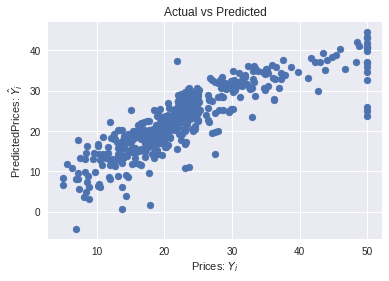

In [14]:
plt.scatter(y, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('PredictedPrices: $\hat{Y}_i$')
plt.title('Actual vs Predicted')
plt.plot()

In [15]:
errors = {}
for feature in boston.feature_names:
    lm = LinearRegression()
    lm.fit(X[[feature]], y)
    mean_squared_error = np.mean((y - lm.predict(X[[feature]])) ** 2)
    errors[feature] = mean_squared_error
errors = sorted(errors.items(), key=lambda x: x[1])

print "Features that Minimize Error"
print 30 * "-"
for e in errors:
    print e[0], "\t", e[1]

Features that Minimize Error
------------------------------
LSTAT 	38.48296722989415
RM 	43.60055177116956
PTRATIO 	62.652200013769274
INDUS 	64.6662216410753
TAX 	65.88727533683911
NOX 	69.00428835540669
CRIM 	71.85234666526337
RAD 	72.1248118807528
AGE 	72.42398092899337
ZN 	73.45169609475562
B 	75.0324292075191
DIS 	79.1463415860711
CHAS 	81.82651411931556


## 5. Evaluation

At this stage in the project you have built a model (or models) that appears to have high quality, from a data analysis perspective. Before proceeding to final deployment of the model, it is important to more thoroughly evaluate the model, and review the steps executed to construct the model, to be certain it properly achieves the business objectives. A key objective is to determine if there is some important business issue that has not been sufficiently considered. At the end of this phase, a decision on the use of the data mining results should be reached.

Let's look at the business objectives again:

* ~~What is a fair price for a house?~~ - We now have a model that will give us a projected price. It might not be perfectly accurate but it will give us 
* ~~Identify what makes a property valuable?~~ We know that the the features that minimized the error were LSTAT, RM, PTRATIO

## 6. Deployment

Creation of the model is generally not the end of the project. Even if the purpose of the model is to increase knowledge of the data, the knowledge gained will need to be organized and presented in a way that is useful to the customer. Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data scoring (e.g. segment allocation) or data mining process. In many cases it will be the customer, not the data analyst, who will carry out the deployment steps. Even if the analyst deploys the model it is important for the customer to understand up front the actions which will need to be carried out in order to actually make use of the created models.


* What would deploying this model look like?
* Where would we deploy this model? Excel, Website, App?
* Should we deploy this model?
* What is the cost of inaccuracy? 

## Conclusion

I hope this was a helpful overview to teach you more about Linear Regression by using the Cross Industry Standard Process for Data Mining. There are a lot more topics to cover but I feel like this gives you good insight into a simple regression model.

If you have questions feel free to reach me jeff.potter6(at)gmail.com or [@jpotts18](https://twitter.com/jpotts18)